## **EASY VISA Exploratory Data Analysis**

In this project, I will apply my data science and machine learning skills to develop a predictive model for Easy Visa Dataset. This project will involve data cleaning, exploratory data analysis (EDA), data preprocessing, model training, hyperparameter tuning and evaluation.

In [27]:
# Import necessary libraries

import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


#### **Phase 1: Data Collection and Preparation**

Task 1.1: Data Loading and Ingestion

In [8]:
# Loading dataset from github
url = r"https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/EasyVisa%20(1).csv"

def load_data(url):
    try:
        if url != "":
            data = pd.read_csv(url)
            snap_shot = data.head()
        else:
            print("Data can't be loaded successfully!")
    except FileNotFoundError as e:
        print(e)
    
    print("Data loaded successfully!")
    return snap_shot   

Task 1.2: Loading dataset into a Pandas DataFrame

In [9]:
load_data(url)

Data loaded successfully!


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [10]:
# Checking the snapshot of the dataset
data = pd.read_csv(url)
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


Task 1.3: Inspecting the dataset for missing values and handle them appropriately

In [11]:
# Checking for missing values
print(f"Snapshot of the dataset showing the missing values: ")
data.isna().sum()

Snapshot of the dataset showing the missing values: 


case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

Task 1.4: Performing data cleaning to ensure the dataset is ready for analysis

In [12]:
# Checking for datatypes
data.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

In [13]:
# Checking for duplicated values
print(f"The number of duplicated values in the dataset is: {data.duplicated().sum()}")

The number of duplicated values in the dataset is: 0


In [14]:
# I will be dropping the Loan Id so as not to disrupt my operation
data = data.drop(columns=["case_id"])

#### **Phase 2: Exploratory Data Analysis (EDA)**

Task 2.1: Conducting EDA to understand the distribution of features and the target variable.


In [29]:
print("The below shows the information of the dataset:")
print("-----------------------------------------------")
data.info()

The below shows the information of the dataset:
-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


In [16]:
# Checking the shape of the dataset
print(f"The shape of the dataset:")
print("--------------------------")

# Unpacking the dataset
rows, columns = data.shape
print(f"Number of rows: {rows}\nNumber of columns: {columns}")

The shape of the dataset:
--------------------------
Number of rows: 25480
Number of columns: 11


In [17]:
# Checking the statistical description of the dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


|Feature    |Distribution   |Outliers   |Spread |
|-----------|---------------|-----------|-------|
|no_of_employees|widely distributed|Heavily present|Widely spread|

The above show only the numerical distribution. However, I will need to group my categorical features so as to get their respective descriptions as well.

In [18]:
# Grouping my categorical features
cat_col = data.select_dtypes(include="object").columns
cat_col

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [19]:
# I want to perform the description on the categorical features as well.
for col in cat_col:
    print("Feature:", col)
    print("----------------------")
    print(data[col].value_counts())
    print("")

Feature: continent
----------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

Feature: education_of_employee
----------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

Feature: has_job_experience
----------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64

Feature: requires_job_training
----------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64

Feature: region_of_employment
----------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64

Feature: unit_of_wage
----------------------
unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64

Feature: full_ti

Task 2.2: Visualize the relationships between features and the target variable using scatter plots, histograms, and box plots.

In [20]:
# Here, I will be using histograms and box plots on visualizing the numerical features only while using scatter plots on categorical features

def numerical_relationship(data, column):
    # Stating the figure size
    plt.figure(figsize=(12,6))
    print("Visual Distribution of the Numerical Features")
    
    # Plotting Histogram
    plt.subplot(1,2,1)
    sns.histplot(data=data, x= data[column], kde=True, bins=30)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    
    # Plotting Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(data=data, x=data[column])
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Skewness of {column} is: {data[column].skew():.3f}\n")


In [21]:
# Let's group my numerical features
num_col = data.select_dtypes(include="number").columns
num_col

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

Visual Distribution of the Numerical Features


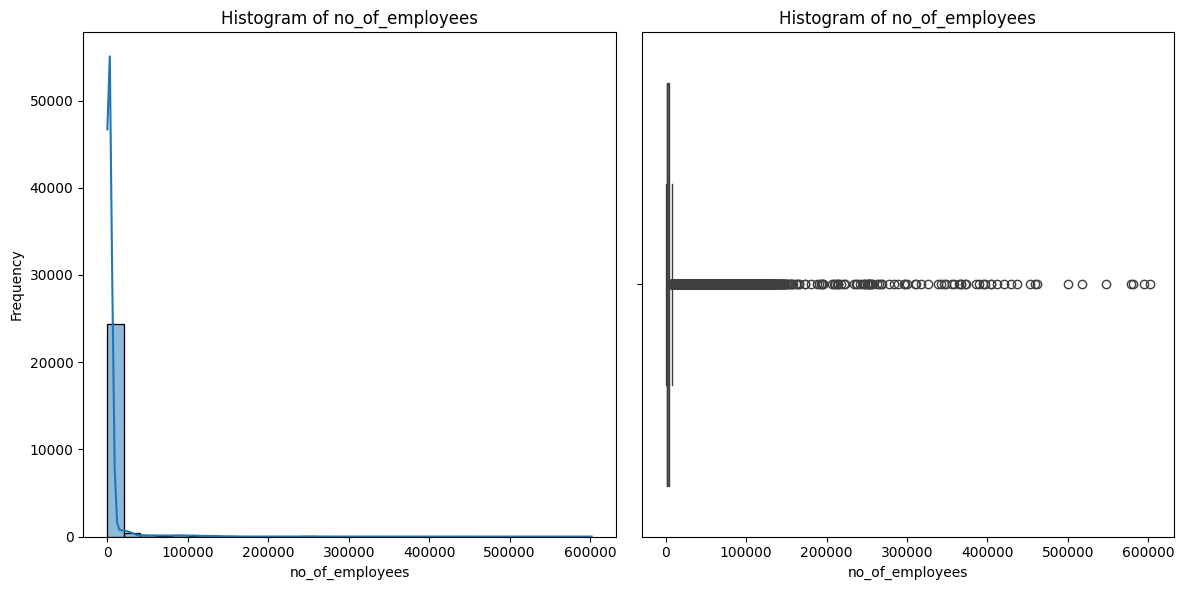

Skewness of no_of_employees is: 12.265

Visual Distribution of the Numerical Features


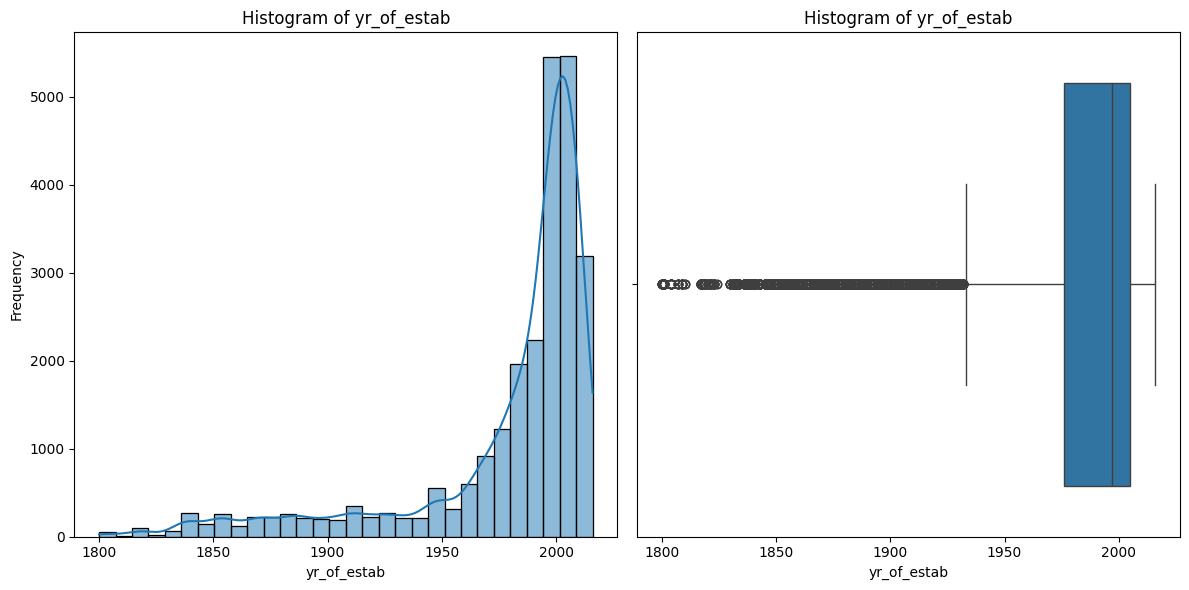

Skewness of yr_of_estab is: -2.037

Visual Distribution of the Numerical Features


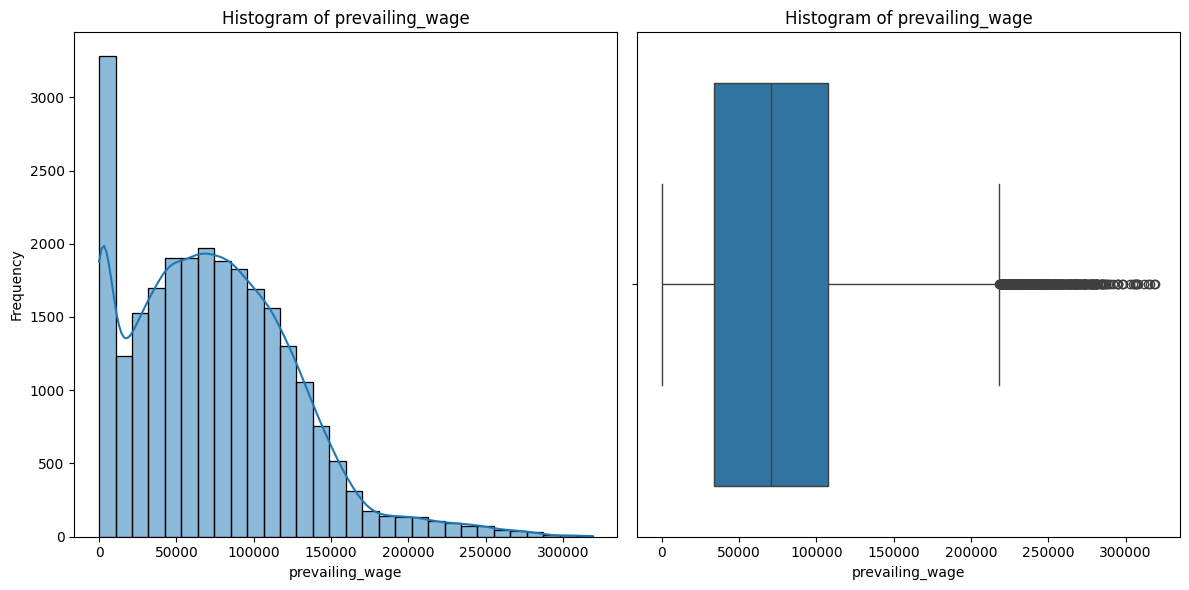

Skewness of prevailing_wage is: 0.756



In [22]:
for col in num_col:
    numerical_relationship(data, col)

|Features       | Skewness       | Outliers|
|---------------|----------------|---------|
|no_of_employees|Highly present   |Highly present|
|yr_of_estab| Highly present    ||

**Checking the distribution for categorical features**

In [25]:
def categorical_distribution(data, feature):
    for col in cat_col:
        plt.figure(figsize=(6,4))
        sns.countplot(data=data, x=data[col], hue=col)
        plt.title(f"Distribution of {col}")

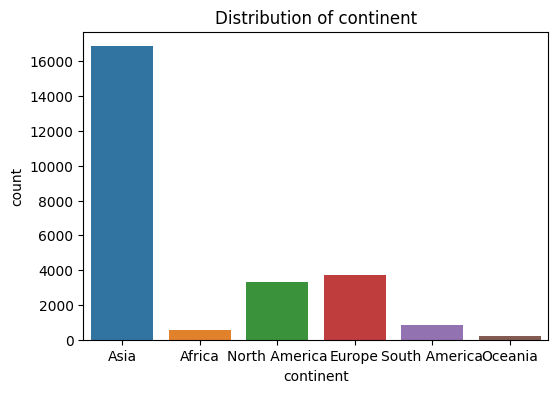

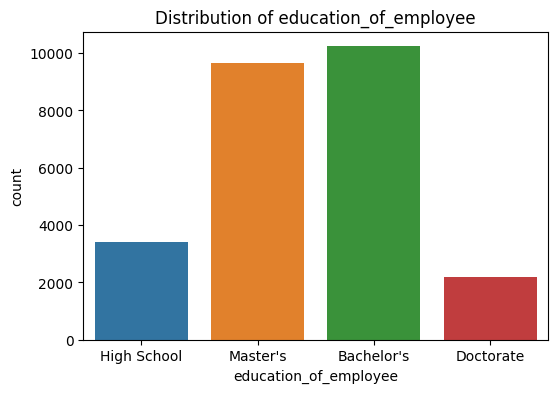

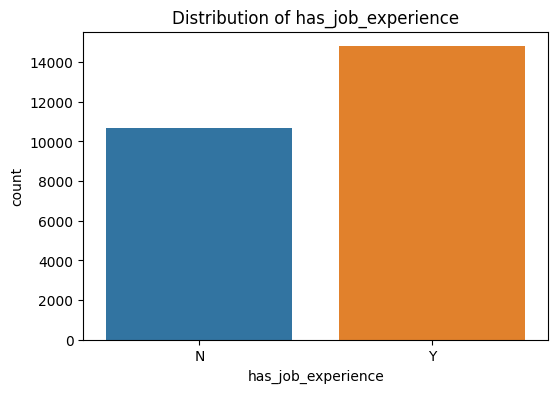

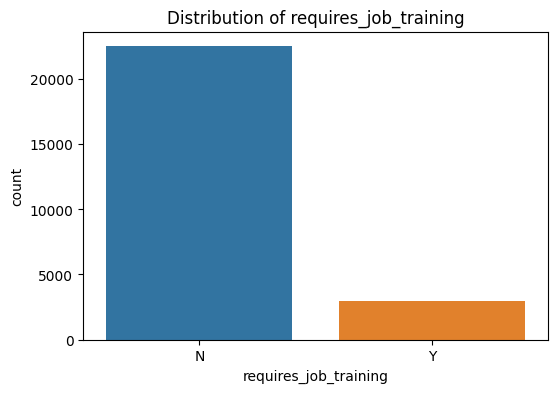

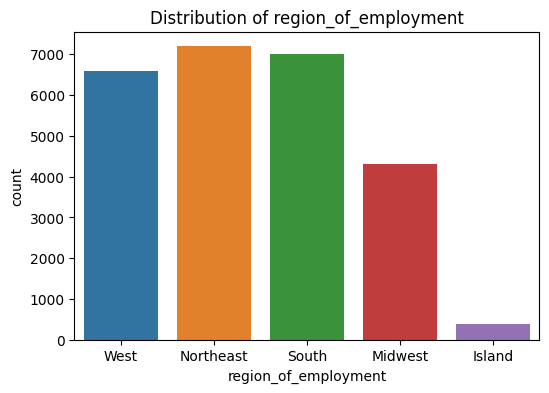

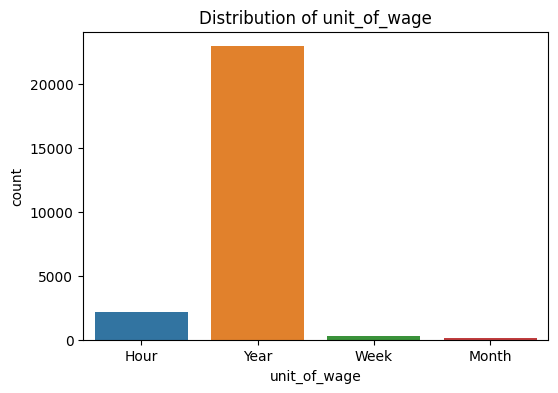

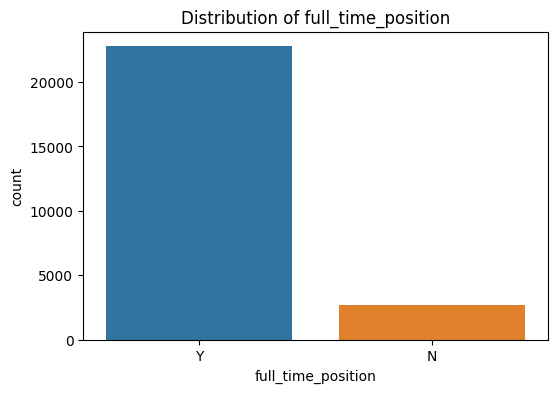

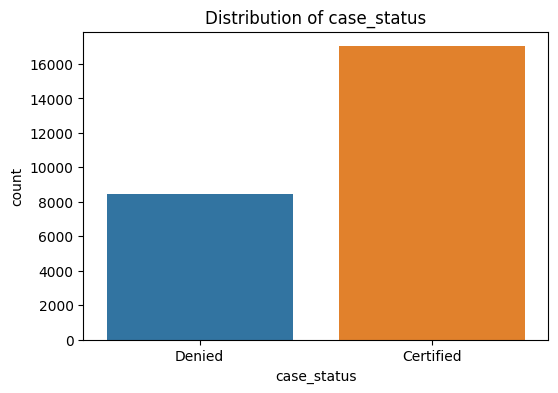

In [26]:
# Calling the function to print them out
categorical_distribution(data, cat_col)

**Comparison among numerical feature**

In [33]:
def scatterplot(data, feature1, feature2):
    corr, p_val = pearsonr(data[feature1], data[feature2])
    plt.figure(figsize=(6,4))
    sns.regplot(data=data, x=feature1, y=feature2, line_kws={'color':'green'})
    plt.title(f"The correlation of {feature1} and {feature2} is: {corr:.2f}\n with p_value of {p_val:.2f}")

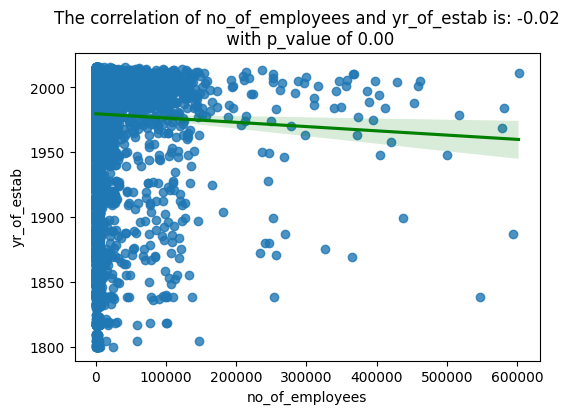

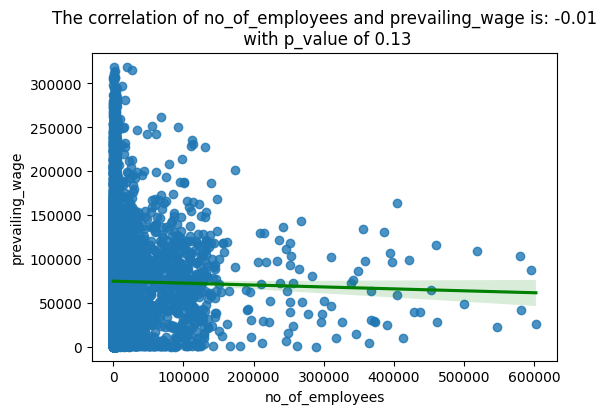

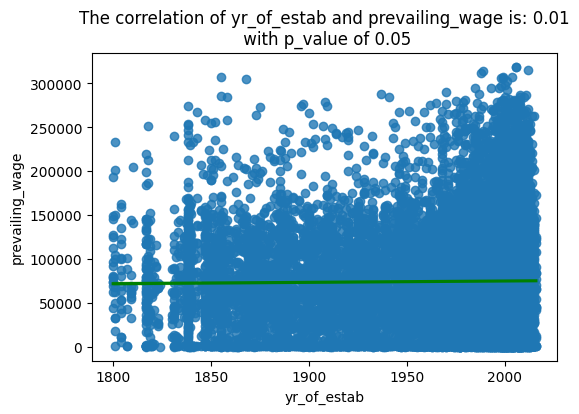

In [34]:
import itertools
for f1, f2 in itertools.combinations(num_col, 2):
    scatterplot(data, f1, f2)

In [35]:
# Now, checking the correlation of two features against the target fature ("case_status")
def scatterplot_trivariate(data, feature1, feature2):
    plt.figure(figsize=(6,4))
    sns.lmplot(data=data, x=feature1, y=feature2, hue='case_status', line_kws={'color':'green'})

<Figure size 600x400 with 0 Axes>

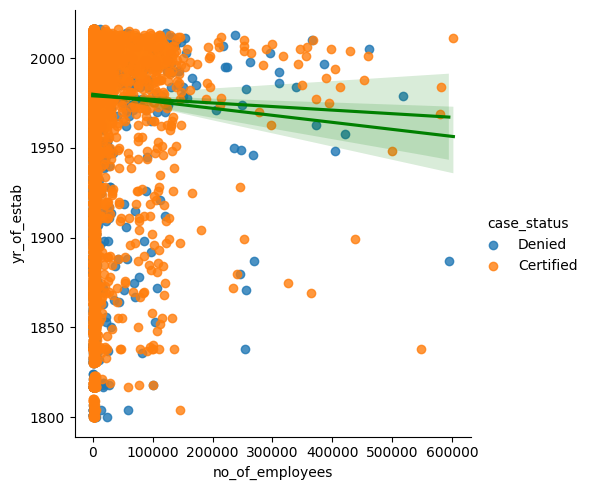

<Figure size 600x400 with 0 Axes>

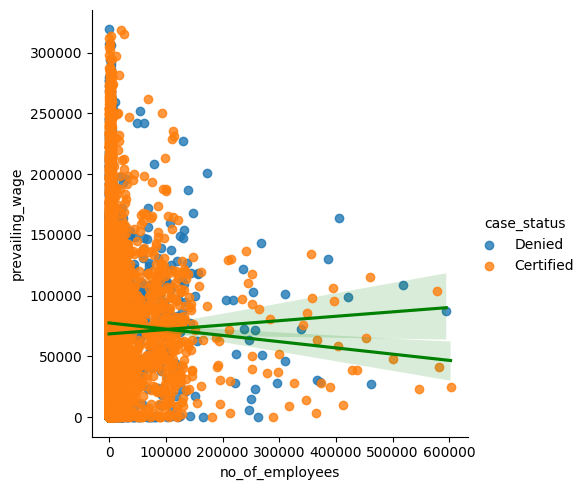

<Figure size 600x400 with 0 Axes>

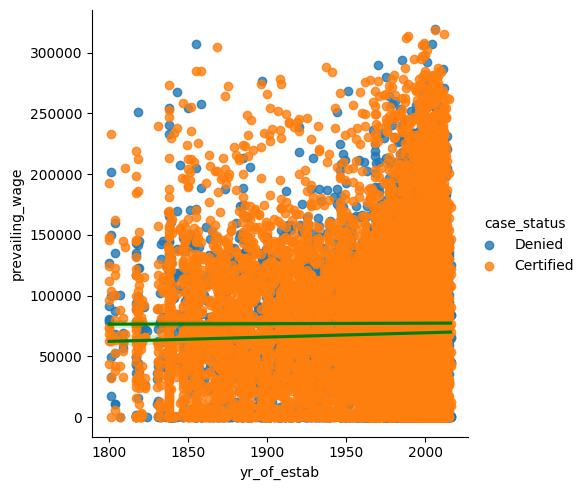

In [36]:
import itertools
for f1, f2 in itertools.combinations(num_col, 2):
    scatterplot_trivariate(data, f1, f2)

Checking the numerical features correlation with the target status, I will need to make the copy of my `data` so that I can convert the `case_status` to a numerical value.

In [49]:
df_corr = data.copy()

df_corr['case_status'] = df_corr['case_status'].map({"Certified":1, "Denied":0})
print(f"List of the data types for the dataset after conversion:\n{'---------' * 6}\n{df_corr.dtypes}")
df_corr

List of the data types for the dataset after conversion:
------------------------------------------------------
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status                int64
dtype: object


,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1
...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,1
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,1
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,1
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,1


In [50]:
# Checking the correlation and plotting the graph

def features_target_corr(data, target):
    num_col=data.select_dtypes(include="number")
    corr = num_col.corrwith(data[target]).drop(target)
    corr_df = corr.to_frame(name="corr").T
    
    # Haatmap
    plt.figure(figsize=(10,2))
    sns.heatmap(corr_df, annot=True, fmt=".3f", cmap="coolwarm", center=0, vmin=-1, vmax=1, cbar_kws={'orientation': 'vertical', 'shrink': 0.7})
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], [target], rotation=0)
    plt.title(f"Correlation of Numeric Features with {target}", fontsize=12)
    plt.tight_layout()
    plt.show()
    

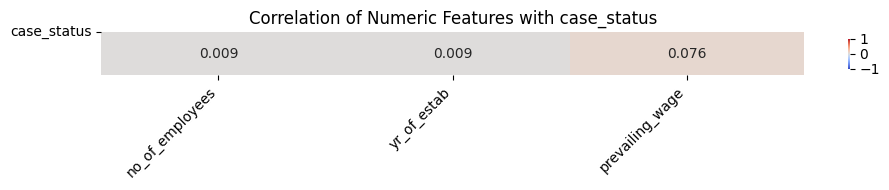

In [51]:
features_target_corr(df_corr, "case_status")

### **Phase3: Data Preprocessing**

In [52]:
# I am going to save the data for preprocessing to be used in the `preprocessing.ipynb` file

data.to_csv("cleaned_EDA_data.csv", index=False)